#What is logistic regression?
#TYPES OF LOGISTIC REGRESSION
##Binary Logistic Regression, in which the target variable has only two possible values, e.g., pass/fail or win/lose.
##Multi Logistic Regression, in which the target variable has three or more possible values that are not ordered, e.g., sweet/sour/bitter or cat/dog/fox.
##Ordinal Logistic Regression, in which the outputs are ordered in some way, e.g., bad/good/better/best or low/medium/high.

geeksforgeeks.org/ml-logistic-regression-using-tensorflow/


Logistic Regression 


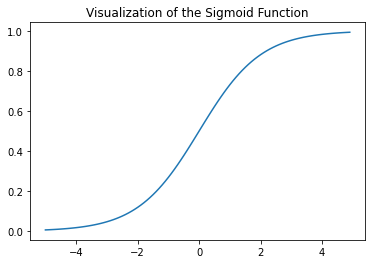

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

def sigmoid(z): 
	return 1 / (1 + np.exp( - z)) 

plt.plot(np.arange(-5, 5, 0.1), sigmoid(np.arange(-5, 5, 0.1))) 
plt.title('Visualization of the Sigmoid Function') 

plt.show() 


In [2]:
!pip install tensorflow


geeksforgeeks.org/ml-logistic-regression-using-tensorflow/


#BUILDING LOGISTIC REGRESSION USING TENSORFLOW 2.0.
##STEP 1: IMPORTING NECESSARY MODULES

In [ ]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf

import numpy as np

##STEP 3: SETTING UP HYPERPARAMETERS AND DATA SET PARAMETERS

In [ ]:
# MNIST dataset parameters.

num_classes = 10 # 0 to 9 digits

num_features = 784 # 28*28

# Training parameters.

learning_rate = 0.01

training_steps = 1000

batch_size = 256

display_step = 50

##STEP 2: LOADING AND PREPARING THE MNIST DATA SET


In [ ]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Convert to float32.

x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Flatten images to 1-D vector of 784 features (28*28).

x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# Normalize images value from [0, 255] to [0, 1].

x_train, x_test = x_train / 255., x_test / 255.

##STEP 4: SHUFFLING AND BATCHING THE DATA


In [ ]:
# Use tf.data API to shuffle and batch data.

train_data=tf.data.Dataset.from_tensor_slices((x_train,y_train))

train_data=train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

##STEP 5: INITIALIZING WEIGHTS AND BIASES


In [ ]:
# Weight of shape [784, 10], the 28*28 image features, and a total number of classes.

W = tf.Variable(tf.ones([num_features, num_classes]), name="weight")

# Bias of shape [10], the total number of classes.

b = tf.Variable(tf.zeros([num_classes]), name="bias")

##STEP 6: DEFINING LOGISTIC REGRESSION AND COST FUNCTION


In [ ]:
# Logistic regression (Wx + b).

def logistic_regression(x):

    # Apply softmax to normalize the logits to a probability distribution.

    return tf.nn.softmax(tf.matmul(x, W) + b)

# Cross-Entropy loss function.

def cross_entropy(y_pred, y_true):

    # Encode label to a one hot vector.

    y_true = tf.one_hot(y_true, depth=num_classes)

    # Clip prediction values to avoid log(0) error.

    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)

    # Compute cross-entropy.

    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

STEP 7: DEFINING OPTIMIZERS AND ACCURACY METRICS


In [ ]:
# Accuracy metric.

def accuracy(y_pred, y_true):

# Predicted class is the index of the highest score in prediction vector (i.e. argmax).

  correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))

  return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Stochastic gradient descent optimizer.

optimizer = tf.optimizers.SGD(learning_rate)

##STEP 8: OPTIMIZATION PROCESS AND UPDATING WEIGHTS AND BIASES

In [ ]:
# Optimization process. 

def run_optimization(x, y):

# Wrap computation inside a GradientTape for automatic differentiation.

    with tf.GradientTape() as g:

        pred = logistic_regression(x)

        loss = cross_entropy(pred, y)

    # Compute gradients.

    gradients = g.gradient(loss, [W, b])

  

    # Update W and b following gradients.

    optimizer.apply_gradients(zip(gradients, [W, b]))

##STEP 9: THE TRAINING LOOP

In [ ]:
# Run training for the given number of steps.

for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):

    # Run the optimization to update W and b values.

    run_optimization(batch_x, batch_y)

    

    if step % display_step == 0:

        pred = logistic_regression(batch_x)

        loss = cross_entropy(pred, batch_y)

        acc = accuracy(pred, batch_y)

        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

##STEP 10: TESTING MODEL ACCURACY USING THE TEST DATA


In [ ]:
# Test model on validation set.

pred = logistic_regression(x_test)

print("Test Accuracy: %f" % accuracy(pred, y_test))